In [ ]:
#download the tweet data in terminal with twint 
pip3 install twint
!pip3 install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint

In [ ]:
#34.052235,-118.243683 are the coordinates for LA 
#here is an example of collecting geo-tagged tweets posted in March, 2019
!twint -g="34.052235,-118.243683,10km" --since "2019-02-27" --until "2019-03-31" -o LA_03.json --json

In [2]:
import json
import pandas as pd

In [3]:
def open_file(path):
    with open(path, 'r') as f:
        data = [json.loads(line) for line in f]
    
    return data

In [4]:
p1 = 'archive/LA_01_16.json'
p1_2 = 'archive/LA_01_02.json'
p3 = 'archive/LA_03.json'
p4 = 'archive/LA_04.json'
p5_6_7 = 'archive/LA_05_06_07.json'
p8 = 'archive/LA_08.json'
p9 = 'archive/LA_09.json'
p10_11_12 = 'archive/LA_10_11_12.json'

##  Data Cleaning 

In [32]:
#before cleaning 
d4

[{'id': 1123376331314458625,
  'conversation_id': '1123376331314458625',
  'created_at': '2019-04-30 16:59:23 PDT',
  'date': '2019-04-30',
  'time': '16:59:23',
  'timezone': '-0700',
  'user_id': 193511555,
  'username': 'sibellacourt',
  'name': 'Sibella Court',
  'place': {'type': 'Point', 'coordinates': [34.0522, -118.243]},
  'tweet': 'Died and went hardware heaven in LA @ Los Angeles, California  https://t.co/bJoa3huDR5',
  'language': 'en',
  'mentions': [],
  'urls': ['https://www.instagram.com/sibellacourt/p/Bw5iRNaBIAD/?igshid=1ph92jn9sopet'],
  'photos': [],
  'replies_count': 0,
  'retweets_count': 0,
  'likes_count': 0,
  'hashtags': [],
  'cashtags': [],
  'link': 'https://twitter.com/sibellacourt/status/1123376331314458625',
  'retweet': False,
  'quote_url': '',
  'video': 0,
  'thumbnail': '',
  'near': '',
  'geo': '34.052235,-118.243683,10km',
  'source': '',
  'user_rt_id': '',
  'user_rt': '',
  'retweet_id': '',
  'reply_to': [],
  'retweet_date': '',
  'translat

In [33]:
#after cleaning 
new_d4

,index,date,tweet
0,0,2019-04-30,Died and went hardware heaven in LA @ Los Ange...
1,1,2019-04-30,@Jayy_Mars tell her to make me tortillas 😋 lol
2,2,2019-04-30,Rehearsing vocals for an upcoming show. Singin...
3,3,2019-04-30,Umm... does a bear 💩 in the woods?
4,4,2019-04-30,"“Ummm, that’s not what I said, you unethical, ..."
...,...,...,...
97605,111225,2019-04-01,"Jackie's Journey ""Hey...What is Virtue?"" ht..."
97606,111226,2019-04-01,I love an inappropriate joke but at the very l...
97607,111227,2019-04-01,Getting high is the best part of my day
97608,111228,2019-04-01,I never knew that @KISSOnline was a bunch of t...


### Process - monthly

In [5]:
def df_clean(df,rm_date):
    data = pd.DataFrame.from_dict(df) 
    #remove redundant data based on their dates 
    if len(rm_date) > 1:
        for date in rm_date:
            data.drop(data[data['date'] == date].index, inplace = True) 
    elif len(rm_date) == 0:
        data = data
    else:
        data.drop(data[data['date'] == rm_date].index, inplace = True) 
        
    #remove non-English tweets
    data.drop(data[data['language'] != 'en'].index, inplace = True)
    #keep only date and text for each tweet
    new_data = data[['date','tweet']]
    new_data.reset_index(level=0, inplace=True)
    
    return new_data

In [6]:
d1 = open_file(p1)
d1_2 = open_file(p1_2)

In [7]:
d3 = open_file(p3)
d4 = open_file(p4)

In [8]:
d5_6_7 = open_file(p5_6_7)

In [9]:
d8 = open_file(p8)
d9 = open_file(p9)

In [10]:
d10_11_12 = open_file(p10_11_12)

In [11]:
new_d1 = df_clean(d1,['2018-12-29','2018-12-30'])

In [12]:
new_d12 = df_clean(d1_2,[])

In [13]:
new_d3 = df_clean(d3,['2019-02-27','2019-02-28'])

In [14]:
new_d4 = df_clean(d4,['2019-03-30','2019-03-31'])

In [15]:
new_d567 = df_clean(d5_6_7,['2019-04-26','2019-04-27','2019-04-28',
                           '2019-04-29','2019-04-30','2019-08-01'])

In [16]:
new_d8 = df_clean(d8,['2019-07-30','2019-07-31'])

In [17]:
new_d9 = df_clean(d9,['2019-08-29','2019-08-30','2019-08-31'])

In [18]:
new_d101112 = df_clean(d10_11_12,['2019-09-28','2019-09-29','2019-09-30'])

## Merge all the dataframes into one single dataframe 

In [19]:
result = pd.concat([new_d1[::-1],new_d12[::-1],new_d3[::-1],
                   new_d4[::-1],new_d567[::-1],new_d8[::-1],
                   new_d9[::-1],new_d101112[::-1]])
result.reset_index(level=0, inplace=True)
result = result[['date','tweet']]
result

,date,tweet
0,2018-12-31,🤔😊 @ General Lee's Cocktail House https://t.c...
1,2018-12-31,Okay so I was super into how to get away with ...
2,2018-12-31,"Hello, old friend 🌟 @Lin_Manuel always helps f..."
3,2018-12-31,I plan to greet the new year with a glass of w...
4,2018-12-31,..for the #birthday 💖💫 #birthdaygirl 🥞 #besthu...
...,...,...
1210613,2019-12-31,NEW YEAR COLOR 💚🧃calorecolor x @sylviapromakeu...
1210614,2019-12-31,2019... What the he'll was that?!?!? @ Los Ang...
1210615,2019-12-31,"The end of the year, or the end of the decade?..."
1210616,2019-12-31,Anyways.. it’s 4PM I’m gonna make a drink. See ya


In [20]:
hi = result.copy()

### Process - weekly

In [21]:
weeks = pd.read_csv('archive/week.csv')

In [22]:
weeks

,Week #,Start Date,End Date
0,1,2018-12-31,2019-01-06
1,2,2019-01-07,2019-01-13
2,3,2019-01-14,2019-01-20
3,4,2019-01-21,2019-01-27
4,5,2019-01-28,2019-02-03
5,6,2019-02-04,2019-02-10
6,7,2019-02-11,2019-02-17
7,8,2019-02-18,2019-02-24
8,9,2019-02-25,2019-03-03
9,10,2019-03-04,2019-03-10


In [24]:
def weekly(week,df):
    df_lst = []
    for i in range(len(week)):
        new_df = df[(df['date'] >= week.iloc[i][1]) & (df['date'] <= weeks.iloc[i][2])]
        df_lst.append(new_df)
    return df_lst

In [25]:
weekly_tweets = weekly(weeks,hi)

In [26]:
len(weekly_tweets)

52

In [31]:
weekly_tweets[0]

,date,tweet
0,2018-12-31,🤔😊 @ General Lee's Cocktail House https://t.c...
1,2018-12-31,Okay so I was super into how to get away with ...
2,2018-12-31,"Hello, old friend 🌟 @Lin_Manuel always helps f..."
3,2018-12-31,I plan to greet the new year with a glass of w...
4,2018-12-31,..for the #birthday 💖💫 #birthdaygirl 🥞 #besthu...
...,...,...
24499,2019-01-06,Now i want a pickle from Disneyland:/
24500,2019-01-06,@vivi_ij @vbrvan I have one but idk i think ca...
24501,2019-01-06,"😂😂😂😂 @ Los Angeles, California https://t.co/c..."
24502,2019-01-06,F***ing shit I wish I was 21 💔


In [28]:
wt = weekly_tweets.copy()

## Sentiment Analysis 
The polarity score is a float within the range [-1.0, 1.0].

In [29]:
import re

In [30]:
from textblob import TextBlob

### Weekly

In [33]:
def weekly_senti(data):
    senti = []
    for df in data:
        df['tweet'] = df['tweet'].apply(lambda x: (re.sub(r'[^\w\s]', '', x)).lower())
        df['senti'] = df['tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)
        avg = sum(df['senti']) / len(df['senti'])
        senti.append(avg)
    return senti

In [34]:
senti_lst = weekly_senti(wt)

<ipython-input-33-fe5d1bd09128>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweet'] = df['tweet'].apply(lambda x: (re.sub(r'[^\w\s]', '', x)).lower())
<ipython-input-33-fe5d1bd09128>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['senti'] = df['tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [35]:
len(senti_lst)

52

In [36]:
senti_lst

[0.14907042564876155,
 0.12582705656348628,
 0.12500046402441534,
 0.13632426431272632,
 0.12745648380474037,
 0.1297692937524862,
 0.15358854538257447,
 0.1349879437157262,
 0.13047716663704406,
 0.13620611578741007,
 0.1359698482190104,
 0.13662722053662443,
 0.13532188779591844,
 0.13102504285158087,
 0.13107515446574025,
 0.13380705078701724,
 0.12950325606680885,
 0.13616479893398464,
 0.13609144846878654,
 0.12838171604861062,
 0.1326498885047508,
 0.1312962756651783,
 0.13888331677586516,
 0.13705129515403358,
 0.12318058574033353,
 0.1285038217049898,
 0.12130270720387204,
 0.12474358251314631,
 0.12793982680554344,
 0.1266916587889006,
 0.12551096427020514,
 0.12765115468650082,
 0.1296108753522392,
 0.11746396814984736,
 0.12176595178785983,
 0.1175260590158088,
 0.11666547303233277,
 0.12317003551905034,
 0.12389404154757556,
 0.11486283523704408,
 0.10967249289099978,
 0.12321400434631638,
 0.12092590620049916,
 0.1223643064809683,
 0.11846503808891298,
 0.11079159494059428

In [37]:
import numpy as np

In [38]:
week_num = list(np.arange(1,53,1))

In [41]:
weekly = pd.DataFrame(list(zip(week_num, senti_lst)),
               columns =['Week', 'Sentiment'])

In [42]:
weekly

,Week,Sentiment
0,1,0.149070
1,2,0.125827
2,3,0.125000
3,4,0.136324
4,5,0.127456
5,6,0.129769
6,7,0.153589
7,8,0.134988
8,9,0.130477
9,10,0.136206


In [43]:
weekly.to_csv('weekly sentiments.csv')

### positivity vs. negativity

In [44]:
hi

,date,tweet
0,2018-12-31,🤔😊 @ General Lee's Cocktail House https://t.c...
1,2018-12-31,Okay so I was super into how to get away with ...
2,2018-12-31,"Hello, old friend 🌟 @Lin_Manuel always helps f..."
3,2018-12-31,I plan to greet the new year with a glass of w...
4,2018-12-31,..for the #birthday 💖💫 #birthdaygirl 🥞 #besthu...
...,...,...
1210613,2019-12-31,NEW YEAR COLOR 💚🧃calorecolor x @sylviapromakeu...
1210614,2019-12-31,2019... What the he'll was that?!?!? @ Los Ang...
1210615,2019-12-31,"The end of the year, or the end of the decade?..."
1210616,2019-12-31,Anyways.. it’s 4PM I’m gonna make a drink. See ya


In [45]:
hi['tweet'] = hi['tweet'].apply(lambda x: (re.sub(r'[^\w\s]', '', x)).lower())

In [46]:
hi['senti'] = hi['tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [47]:
hi

,date,tweet,senti
0,2018-12-31,general lees cocktail house httpstcop1hhs1amxg,0.050000
1,2018-12-31,okay so i was super into how to get away with ...,0.408333
2,2018-12-31,hello old friend lin_manuel always helps find...,0.100000
3,2018-12-31,i plan to greet the new year with a glass of w...,0.136364
4,2018-12-31,for the birthday birthdaygirl besthubsever p...,-0.300000
...,...,...,...
1210613,2019-12-31,new year color calorecolor x sylviapromakeup ...,0.136364
1210614,2019-12-31,2019 what the hell was that los angeles calif...,0.000000
1210615,2019-12-31,the end of the year or the end of the decade w...,0.255682
1210616,2019-12-31,anyways its 4pm im gonna make a drink see ya,0.000000


In [48]:
neg = hi[hi['senti'] < 0]

In [49]:
pos = hi[hi['senti'] > 0]

### Monthly

In [47]:
s1 = hi[hi['date'] < '2019-02-01']

In [76]:
s1

,date,tweet,token
0,2019-01-01,bruh just send it you miss 100 of the shots yo...,0.000000
1,2019-01-01,new goals new beginnings new adventures god bl...,0.269091
2,2019-01-01,champagne wishes amp caviar dreams happy 2019...,0.816667
3,2019-01-01,happy nye i love you all,0.650000
4,2019-01-01,happy new year nye 2019 los angeles californi...,0.468182
...,...,...,...
109376,2019-01-31,marcbernardin emeraldcitycon le pichet for bre...,0.000000
109377,2019-01-31,ammyisdead youre built like thotiana,0.000000
109378,2019-01-31,my bbff family dance4life becausewecan beyou b...,0.000000
109379,2019-01-31,on set in the trailer with a cd player dtla cd...,0.000000


In [59]:
s2 = hi[(hi['date'] >= '2019-02-01') & (hi['date'] < '2019-03-01') ]

In [62]:
s3 = hi[(hi['date'] >= '2019-03-01') & (hi['date'] < '2019-04-01') ]

In [64]:
s4 = hi[(hi['date'] >= '2019-04-01') & (hi['date'] < '2019-05-01') ]
s5 = hi[(hi['date'] >= '2019-05-01') & (hi['date'] < '2019-06-01') ]

In [66]:
s6 = hi[(hi['date'] >= '2019-06-01') & (hi['date'] < '2019-07-01') ]
s7 = hi[(hi['date'] >= '2019-07-01') & (hi['date'] < '2019-08-01') ]
s8 = hi[(hi['date'] >= '2019-08-01') & (hi['date'] < '2019-09-01') ]

In [67]:
s9 = hi[(hi['date'] >= '2019-09-01') & (hi['date'] < '2019-10-01') ]
s10 = hi[(hi['date'] >= '2019-10-01') & (hi['date'] < '2019-11-01') ]
s11 = hi[(hi['date'] >= '2019-11-01') & (hi['date'] < '2019-12-01') ]
s12 = hi[(hi['date'] >= '2019-12-01') & (hi['date'] < '2020-01-01') ]

In [69]:
lst_s = [s1,s2,s3,s4,s5,s6,
        s7,s8,s9,s10,s11,s12]

In [70]:
def mon_st(df):
    avg_lst = []
    for i in df:
        avg = sum(i['token']) / len(i['token']) 
        avg_lst.append(avg)
    return avg_lst

In [86]:
st_by_month = pd.Series(mon_st(lst_s), name = 'sentiment', index =['1','2','3',
                                                                   '4', '5','6',
                                                                   '7','8','9',
                                                                   '10','11','12'] )

In [87]:
st_by_month

1     0.131589
2     0.136597
3     0.135684
4     0.131657
5     0.132580
6     0.132126
7     0.125013
8     0.124905
9     0.119801
10    0.118279
11    0.116804
12    0.120809
Name: sentiment, dtype: float64

In [88]:
st_by_month.to_csv('monthly_sentiment.csv')

## Text mining / NLP

https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk?utm_source=adwords_ppc&utm_campaignid=1565261270&utm_adgroupid=67750485268&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332661264374&utm_targetid=aud-299261629574:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=9061191&gclid=Cj0KCQjwub-HBhCyARIsAPctr7y4FS9tzrw9YOYV0xoH3_NhY8dCsCKY28Olnu2LB4L5g207B9PDlCAaAhQnEALw_wcB

The downloader script is broken. As a temporal workaround can manually download the punkt tokenizer from http://www.nltk.org/nltk_data/ and then place the unzipped folder in the corresponding location. The default folders for each OS is: /usr/local/share/nltk_data/tokenizers

In [50]:
import nltk
import ssl

In [28]:
#disable ssl checking 
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [51]:
# work tokenization 
from nltk.tokenize import word_tokenize

In [52]:
pos

,date,tweet,senti
0,2018-12-31,general lees cocktail house httpstcop1hhs1amxg,0.050000
1,2018-12-31,okay so i was super into how to get away with ...,0.408333
2,2018-12-31,hello old friend lin_manuel always helps find...,0.100000
3,2018-12-31,i plan to greet the new year with a glass of w...,0.136364
5,2018-12-31,ohsnapitzarlene on barely on page 14 lol hmm...,0.410000
...,...,...,...
1210608,2019-12-31,date night with the beautiful marchetta91 go l...,0.850000
1210611,2019-12-31,one of my favorites from the golden age of hol...,0.116667
1210612,2019-12-31,itsceliaau so beautiful and cute,0.675000
1210613,2019-12-31,new year color calorecolor x sylviapromakeup ...,0.136364


In [53]:
neg

,date,tweet,senti
4,2018-12-31,for the birthday birthdaygirl besthubsever p...,-0.300000
16,2018-12-31,dive into some rodanandfields activehydrationb...,-0.600000
18,2018-12-31,its the littlest simplest things that take my ...,-0.093750
24,2018-12-31,still half tru,-0.166667
38,2018-12-31,we are looking back at all the we had on http...,-0.312500
...,...,...,...
1210590,2019-12-31,jennnwest im mad about how close the voting is,-0.625000
1210598,2019-12-31,daisygbaby daaaaaamn dont fuck around yeah t...,-0.366667
1210599,2019-12-31,do we have any myheroacademia fans out there ...,-0.800000
1210602,2019-12-31,the supreme court has roundly rejected prior r...,-0.100000


In [54]:
pos_df = pos.copy()
neg_df = neg.copy()

In [55]:
pos_df['tweet'] = pos_df['tweet'].apply(lambda x: (re.sub(r'[^\w\s]', '', x)).lower())

In [56]:
pos_df['tweet'] = pos_df['tweet'].apply(lambda x: (re.sub(r'https\w+', '', x)))

In [57]:
pos_df['token'] = pos_df['tweet'].apply(lambda x: word_tokenize(x))

In [58]:
pos_df

,date,tweet,senti,token
0,2018-12-31,general lees cocktail house,0.050000,"[general, lees, cocktail, house]"
1,2018-12-31,okay so i was super into how to get away with ...,0.408333,"[okay, so, i, was, super, into, how, to, get, ..."
2,2018-12-31,hello old friend lin_manuel always helps find...,0.100000,"[hello, old, friend, lin_manuel, always, helps..."
3,2018-12-31,i plan to greet the new year with a glass of w...,0.136364,"[i, plan, to, greet, the, new, year, with, a, ..."
5,2018-12-31,ohsnapitzarlene on barely on page 14 lol hmm...,0.410000,"[ohsnapitzarlene, on, barely, on, page, 14, lo..."
...,...,...,...,...
1210608,2019-12-31,date night with the beautiful marchetta91 go l...,0.850000,"[date, night, with, the, beautiful, marchetta9..."
1210611,2019-12-31,one of my favorites from the golden age of hol...,0.116667,"[one, of, my, favorites, from, the, golden, ag..."
1210612,2019-12-31,itsceliaau so beautiful and cute,0.675000,"[itsceliaau, so, beautiful, and, cute]"
1210613,2019-12-31,new year color calorecolor x sylviapromakeup ...,0.136364,"[new, year, color, calorecolor, x, sylviaproma..."


In [59]:
neg_df['tweet'] = neg_df['tweet'].apply(lambda x: (re.sub(r'[^\w\s]', '', x)).lower())
neg_df['tweet'] = neg_df['tweet'].apply(lambda x: (re.sub(r'https\w+', '', x)))
neg_df['token'] = neg_df['tweet'].apply(lambda x: word_tokenize(x))

In [60]:
neg_df

,date,tweet,senti,token
4,2018-12-31,for the birthday birthdaygirl besthubsever p...,-0.300000,"[for, the, birthday, birthdaygirl, besthubseve..."
16,2018-12-31,dive into some rodanandfields activehydrationb...,-0.600000,"[dive, into, some, rodanandfields, activehydra..."
18,2018-12-31,its the littlest simplest things that take my ...,-0.093750,"[its, the, littlest, simplest, things, that, t..."
24,2018-12-31,still half tru,-0.166667,"[still, half, tru]"
38,2018-12-31,we are looking back at all the we had on and...,-0.312500,"[we, are, looking, back, at, all, the, we, had..."
...,...,...,...,...
1210590,2019-12-31,jennnwest im mad about how close the voting is,-0.625000,"[jennnwest, im, mad, about, how, close, the, v..."
1210598,2019-12-31,daisygbaby daaaaaamn dont fuck around yeah t...,-0.366667,"[daisygbaby, daaaaaamn, dont, fuck, around, ye..."
1210599,2019-12-31,do we have any myheroacademia fans out there ...,-0.800000,"[do, we, have, any, myheroacademia, fans, out,..."
1210602,2019-12-31,the supreme court has roundly rejected prior r...,-0.100000,"[the, supreme, court, has, roundly, rejected, ..."


In [61]:
pos_lst = pos_df['token'].to_list()
pos_lst

[['general', 'lees', 'cocktail', 'house'],
 ['okay',
  'so',
  'i',
  'was',
  'super',
  'into',
  'how',
  'to',
  'get',
  'away',
  'with',
  'murder',
  'but',
  'honestly',
  'by',
  'season',
  '2',
  'i',
  'was',
  'done',
  'way',
  'too',
  'much',
  'drama',
  'and',
  'plot',
  'twist',
  'for',
  'me',
  'to',
  'keep',
  'up'],
 ['hello',
  'old',
  'friend',
  'lin_manuel',
  'always',
  'helps',
  'find',
  'my',
  'shine',
  'even',
  'when',
  'the',
  'night',
  'feels',
  'darkest'],
 ['i',
  'plan',
  'to',
  'greet',
  'the',
  'new',
  'year',
  'with',
  'a',
  'glass',
  'of',
  'wine',
  'in',
  'hand'],
 ['ohsnapitzarlene',
  'on',
  'barely',
  'on',
  'page',
  '14',
  'lol',
  'hmm',
  'i',
  'do',
  'not',
  'think',
  'its',
  'based',
  'off',
  'of',
  'anything',
  'its',
  'fiction',
  'i',
  'do',
  'suggest',
  'getting',
  'the',
  'book',
  'i',
  'love',
  'to',
  'read',
  'so',
  'i',
  'dont',
  'have',
  'a',
  'problem',
  'reading',
  'it

In [62]:
neg_lst = neg_df['token'].to_list()
neg_lst

[['for',
  'the',
  'birthday',
  'birthdaygirl',
  'besthubsever',
  'peterpalandjian',
  'heres',
  'to',
  '19',
  'amp',
  'to',
  'my',
  'la',
  'ride',
  'or',
  'die',
  'crew',
  'tonight',
  'dupars',
  'late',
  'night',
  'diner'],
 ['dive',
  'into',
  'some',
  'rodanandfields',
  'activehydrationbodyreplenish',
  'before',
  'you',
  'head',
  'out',
  'into',
  'the',
  'cold',
  'los',
  'angeles',
  'california'],
 ['its',
  'the',
  'littlest',
  'simplest',
  'things',
  'that',
  'take',
  'my',
  'breath',
  'away',
  'maybe',
  'theyre',
  'not',
  'so',
  'little',
  'or',
  'so',
  'simple',
  'maybe',
  'theyre',
  'from',
  'the',
  'heart',
  'beauty',
  'simplicity'],
 ['still', 'half', 'tru'],
 ['we',
  'are',
  'looking',
  'back',
  'at',
  'all',
  'the',
  'we',
  'had',
  'on',
  'and',
  'celebrating',
  'the',
  'hottest',
  'drops',
  'of',
  '2018',
  'on',
  'our',
  'site',
  'riot',
  'society',
  'clothing',
  'came',
  'with',
  'mad',
  'fla

In [63]:
pos_lst = [words for sublst in pos_lst for words in sublst]
pos_lst = ' '.join(pos_lst)

In [64]:
neg_lst = [words for sublst in neg_lst for words in sublst]
neg_lst = ' '.join(neg_lst)

In [65]:
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator

In [66]:
from nltk.corpus import stopwords

In [67]:
STOPWORDS.update(['los', 'angele','angeles','losangele','losangeles','california','today','amp','one',
                 'need','show','la','day','week','year','month','see','know','think','now',
                 'got','will','make','look','link','watch','im','u','many','much','little',
                  'less','new','ready','first','right','time','take','want','dont','made',
                  'alway','always','come','back','people','thing','things','still','going','really'])
STOPWORDS.update(stopwords.words('english'))

In [68]:
pos_wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white",width=800, height=400).generate(pos_lst)

In [69]:
neg_wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white",width=800, height=400).generate(neg_lst)

In [70]:
import matplotlib.pyplot as plt

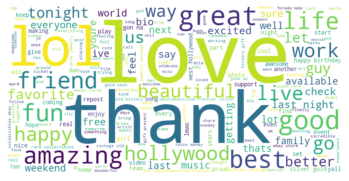

<Figure size 432x288 with 0 Axes>

In [75]:
plt.imshow(pos_wordcloud,interpolation="bilinear")
plt.axis("off")
plt.figure()
pos_wordcloud.to_file('pos_wordcloud.png')

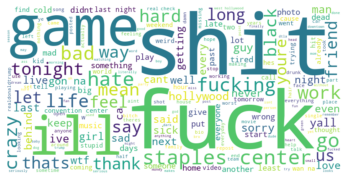

<Figure size 432x288 with 0 Axes>

In [76]:
plt.imshow(neg_wordcloud,interpolation="bilinear")
plt.axis("off")
plt.figure()
neg_wordcloud.to_file('neg_wordcloud.png')